# Deep Learning Theoretical Aspects - Assignment 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sklearn
%matplotlib inline

Much of the power of neural networks comes from the nonlinearity that is inherited in activation functions.  
Show that a network of N layers that uses a linear activation function can be reduced into a network with just an input and output layers.


Given N linear layers, each of form wnX + bn, we can write the network as: 
(wn....(w3(w2(w1X + b1) + b2) + b3).... + bn) which can be rewritten to:
wn..w3w2w1X + b1w2w3... + b2w3... + b3...+ bn
which is a linear function and thus the network can be rewritten as a single layer network with this 
function as its activation. More generally, any linear combination of linear function is a linear function.

### Derivatives of Activation Functions
Compute the derivative of these activation functions:

1 Sigmoid
<img src="https://cdn-images-1.medium.com/max/1200/1*Vo7UFksa_8Ne5HcfEzHNWQ.png" width="150">

$ \frac{df}{dt} = f(t)(1 - f(t)) $

2 Relu 

<img src="https://cloud.githubusercontent.com/assets/14886380/22743194/73ca0834-ee54-11e6-903f-a7efd247406b.png" width="200">

$\frac{df}{dx} = \begin{cases} 
0 & \text{if  }  x < 0 \\
1 & \text{if  }  x > 0 \\
undefined & \text{if  }  x = 0 \\
\end{cases}$

3 Softmax $S_j = \frac{e^{z_j}} {\sum_{k=1}^K {e^{z_i}}}$

$\frac{dS_j}{dz_i} = \begin{cases} 
S_j(1 - S_i) & \text{if  } i = j \\
-S_iS_j & \text{if  }  i  != j \\
\end{cases}$

### Back Propagation
Use the delta rule and backprop to compute the derivatives for these computations.  
Use these values -  
*x1 = 1, x2 = 3, x3 = -2, x4 = 2*

```
z = x1 + 5*x2 - 3*x3^2
```

In [0]:
x1, x2, x3, x4 = 1, 3, -2, 2
q1 = 5*x2
q2 = -3*x3**2
z = x1 + q1 + q2
dz_dx1 = 1
dz_dq1 = 1
dz_dq2 = 1
dq1_dx2 = 5
dq2_dx3 = -6*x3

dz = [dz_dx1, dz_dq1*dq1_dx2, dz_dq2*dq2_dx3]

print(dz, np.sum(dz))

[1, 5, 12] 18


```
z = x1*(x2-4) + exp(x3^2) / 5*x4^2
```

In [0]:
q1 = x2-4
q2 = x1*q1
q3 = x3**2
q4 = np.exp(q3)
q5 = x4**2
q6 = 5*q5
q7 = q4/q6

z = q2 + q7

dz_dq2 = 1
dq2_dx1 = q1

dz_dx1 = dz_dq2*dq2_dx1

dq2_dq1 = x1
dq1_dx2 = 1

dz_dx2 = dz_dq2*dq2_dq1*dq1_dx2

dz_dq7 = 1
dq7_dq4 = 1/q6
dq4_dq3 = np.exp(q3)
dq3_dx3 = 2*x3

dz_dx3 = dz_dq7*dq7_dq4*dq4_dq3*dq3_dx3

dq7_dq6 = -q4/(q6**2)
dq6_dq5 = 5
dq5_dx4 = 2*x4

dz_dx4 = dq7_dq6*dq6_dq5*dq5_dx4

dz = [dz_dx1, dz_dx2, dz_dx3, dz_dx4]

print(dz, np.sum(dz))

[-1, 1, -10.919630006628848, -2.7299075016572116] -13.649537508286059


```
z = 1/x3 + exp( (x1+5*(x2+3)) ^2 )
```

In [0]:
q1 = 1/x3
q2 = x2 + 3
q3 = 5*q2
q4 = x1 + q3
q5 = q4**2
q6 = np.exp(q5)

z = q1 + q6

dz_dq6 = 1
dq6_dq5 = np.exp(q5) # e^961
dq5_dq4 = 2*q4
dq4_dx1 = 1

dz_dx1 = dz_dq6*dq6_dq5*dq5_dq4*dq4_dx1  # 62*e^961

dq4_dq3 = 1
dq3_dq2 = 5
dq2_dx2 = 1

dz_dx2 = dz_dq6*dq6_dq5*dq5_dq4*dq4_dq3*dq3_dq2*dq2_dx2  # 310*e^961

dz_dq1 = 1
dq1_dx3 = -1/(x3**2)

dz_dx3 = dz_dq1*dq1_dx3

dz = [dz_dx1, dz_dx2, dz_dx3]

print(dz, np.sum(dz))

# The answer is (62*e^961, 310*e^961, -0.25)

[inf, inf, -0.25] inf


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


### Sample convolutions
Consider the following convolution filters:
```python
k1 = [ [0 0 0], [0 1 0], [0 0 0] ]
k2 = [ [0 0 0], [0 0 1], [0 0 0] ]
k3 = [ [-1-1 -1], [-1 8 -1], [-1 -1 -1] ]
k4 = [ [1 1 1], [1 1 1], [1 1 1] ] / 9
```

Can you guess what each of them computes?

* k1 - identity
* k2 - translation (shift)
* k3 - edge detection
* k4 - bluring with normalization

#### Apply to arrays
Apply the convolutions above to the following array:


In [2]:
x = np.array([[-1, -3, -4,  0, -1],
       [ 2, -2, -4,  0, -2],
       [-3, -2,  2,  2,  3],
       [ 0, -3, -4, -4, -2],
       [-4, -2,  2,  0,  1]])

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy import signal


k1 = np.array([ [0, 0, 0], [0, 1, 0], [0, 0, 0] ])
k2 = np.array([ [0, 0, 0], [0, 0, 1], [0, 0, 0] ])
k3 = np.array([ [-1, -1, -1], [-1, 8, -1], [-1, -1, -1] ])
k4 = np.array([ [1, 1, 1], [1, 1, 1], [1, 1, 1] ]) / 9

    
def applyFilter(m, f):
    res = np.zeros((m.shape[0] - f.shape[0] + 1, m.shape[1] - f.shape[1] + 1))
    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
            i0 = int(i + f.shape[0] / 2 - 1)
            j0 = int(j + f.shape[1] / 2 - 1)
            res[i,j] = np.sum(f*m[i0: i0 + f.shape[0], j0: j0 + f.shape[1]])
    return res

ks = [k1, k2, k3, k4]

for k in ks:
    # print(signal.convolve2d(x, k, boundary='fill', mode='valid'))
    print(applyFilter(x, k))

[[-2. -4.  0.]
 [-2.  2.  2.]
 [-3. -4. -4.]]
[[-4.  0. -2.]
 [ 2.  2.  3.]
 [-4. -4. -2.]]
[[ -3. -25.   4.]
 [ -4.  33.  27.]
 [-13. -27. -36.]]
[[-1.66666667 -1.22222222 -0.44444444]
 [-1.55555556 -1.66666667 -1.        ]
 [-1.55555556 -1.          0.        ]]


What would be the output dimensions in these cases?
1. No padding, stride of 1
1. No padding, stride of 2
1. Zero padding, stride of 1
1. Zero padding, stride of 2


1.   3 X 3
2.   2 X 2
3.   5 X 5
4.   3 X 3

Consider convolutions with kernels of size 3x3, 5x5, 7x7 etc.

Come up with an equation for the dimension of the output image after a convolution layer. Your equation should also take into account padding and the stride.

* N = Input size
* F = Filter size
* P = Padding size
* S = Stride size

Output size = (N−F+2P)/S + 1

#### Apply to images
Apply the convolution filters above on the image. Plot the results:

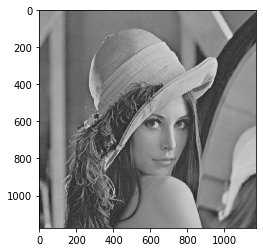

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
im = mpimg.imread('lena.jpg')
plt.imshow(im)

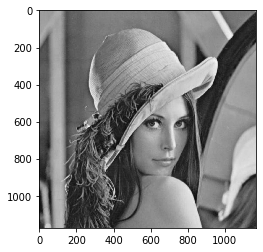

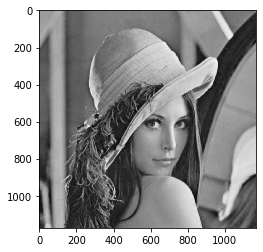

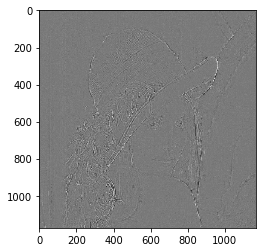

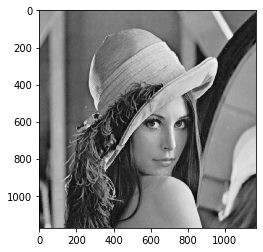

In [0]:
for k in ks:
    con = signal.convolve2d(im[:,:,0], k, boundary='fill', mode='valid')
    plt.imshow(con, cmap='gray')
    plt.show()

### Network dimensions
Write below the dimensions and number of parameters in each layer of this network for the MNIST data (images of size 28x28, with a single grayscale depth dimension):

- Convolutional Layer #1: Applies 32 5x5 filters (extracting 5x5-pixel subregions), with ReLU activation function
- Pooling Layer #1: Performs max pooling with a 2x2 filter and stride of 2 (which specifies that pooled regions do not overlap)
- Convolutional Layer #2: Applies 64 5x5 filters, with ReLU activation function
- Pooling Layer #2: Again, performs max pooling with a 2x2 filter and stride of 2
- Dense Layer #1: 1,024 neurons, with dropout regularization rate of 0.4 (probability of 0.4 that any given element will be dropped during training)
- Dense Layer #2 (Logits Layer): 10 neurons, one for each digit target class (0–9).


* Input size = 28 * 28 = 784
* **Convolutional Layer #1**: 32 * (5 * 5 + 1) = 832 parameters, + 1 is for bias.
* Data size = 32 * 24 * 24 = 18432. 
Dragging a 5 X 5 filter 
across an image results in a 24 X 24 image, we create 32 different images for each filter.
* **Pooling Layer #1**: 0 parameters, we just select max in 2 X 2 regions.
* Data size = 32 * 12 * 12 = 4608. We select one value in each 2 X 2 region, thus, we end up with 12 X 12 images. 
* **Convolutional Layer #2**: 64 * (5 * 5 + 1) = 1664 parameters
* Data size = 64 * 32 * 8 * 8 = 131072
* **Pooling Layer #2**: 0 parameters, same as for Pooling Layer #1
* Data size = 64 * 32 * 4 * 4 = 32768
* **Dense Layer #1**: 1024 * (32768 + 1) parameters?
* Data size = 1024 We don't multiply by 0.4 as for different inputs we drop different neurons, therefore, we still have 1024 neurons in total.
* **Dense Layer #2 (Logits Layer)**: 1024 * (10 + 1) parameters
* Output size = 10

### Learning in biological neurons
Try to come up with a learning algorithm for a neural network that replaces back propagation, and mimicks the operation of biological neurons.

<!-- Transfer learning can replace back propagation, but it doesn't seem to mimick the operation of biological neurons. -->

We can build a learning algorithm based on the Hebbian theory of "neurons firing together and wiring together".

Particularily, we can apply the following rules:

1. If two neurons on either side of a synapse (connection) are activated simultaneously, then the strength of that synapse is selectively increased. 
2. If two neurons on either side of a synapse are activated asynchronously, then that synapse is selectively weakened or eliminated."

The rule for updating weights can be written as 

$\Delta w_i = \eta y x_i $

where $\eta$ is the learning rate, y is the postsynaptic response $w^Tx$, $x_i$ is ith input.

We can use some normalization to prevent weights to increase infinitely.

<!-- Based on https://www.cs.bham.ac.uk/~pxt/NC/l5_JB.pdf and wiki -->

### Puppy or bagel?
We've seen in class the (hopefully) funny examples of challenging images (Chihuahua or muffin, puppy or bagel etc.). 

Let's say you were asked by someone to find more examples like that. You are able to call the 3 neural networks that won the recent ImageNet challenges, and get their predictions (the entire vector of probabilities for the 1000 classes).  

Describe methods that might assist you in finding more examples.

We can search classes with correlated probabilities, i.e. such that if an image is classified as A with a certain probability, then the probability that it's B is similar.

We can compute correlation using the formula

cor(X,Y) = $ cov(X,Y)/(\sigma_X*\sigma_Y) $

where X is the distribution of the class A on the input data, Y - is the distribution of B.

Alternatively, we can define a threshold, and use the networks to map images to two classes. Then we can look for pairs of classes used together with a high frequency.

Besides that, we can use the fact that similar classes produce similar patterns, and to look at hidden layers to search for classes that activate the same sets of neurons. This method is probably more complicated as it involves some graph analysis.

#### Gradient Checking
When computing the gradient yourself, it's recommended to manually check the gradient to make sure you haven't made an error.  
We'll use the following equation for this, which produces more robust results than the standard definition of a derivative:


<img src="http://ufldl.stanford.edu/wiki/images/math/a/2/3/a23bea0ab48ded7b9a979b68f6356613.png" width="250">

We'll numerically approximate it using:

<img src="http://ufldl.stanford.edu/wiki/images/math/4/8/a/48a000aed96c8595fcca2a45f48343ce.png" width="250">

Write a function that evaluates the gradient locally and use it to numerically compute the gradient along several randomly chosen dimensions. Compare your results with your analytically computed gradient. The numbers should match almost exactly along all dimensions.

In [39]:
# import sys
# epsilon = sys.float_info.epsilon


def gradient(func, X, epsilon = 0.1):
    return (func(X + epsilon) - func(X - epsilon)) / (2*epsilon)


x1, x2, x3, x4 = 1.0, 3.0, -2.0, 2.0
X = np.array([x1, x2, x3])
z1 = lambda x: x[0] + 5*x[1] - 3*x[2]**2
g = gradient(z1, X) 
print('%.2f' % g)

z2 = lambda x: x[0]*(x[1]-4) + np.exp(x[2]**2) / (5*x[3]**2)
g = gradient(z2, np.array([x1, x2, x3, x4]), 0.1e-5) 
print('%.2f' % g)

z3 = lambda x: 1/x[2] + np.exp( (x[0]+5*(x[1]+3))**2 )
g = gradient(z3, np.array([x1, x2, x3])) 
print('%.2f' % g)

# Now we randomly choose a dimension and evaluate gradient.
# We use z1
z1_x2 = lambda x: - 3*x**2
g = gradient(z1_x2, X[2])
print('%.2f' % g)  # What a surpise it's what we computed analytically.

18.00
-13.65
nan
12.00


/Users/mariao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/Users/mariao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
